Check the in-situ stations in the HMA region.

In [1]:
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.patches as mpatches

In [2]:
path_hma_gtng = 'D:\Desktop\insitu\hma-extent\hma-extent\HMA\hma_gtng_202307_subregions.gpkg'
path_hma_region_lake_insitu = 'D:\Desktop\insitu\water-extent\water-extent\lakes\HydroLakes_v10_hma_region_insitu.gpkg'
path_hma_region_lake = 'D:\Desktop\insitu\water-extent\water-extent\lakes\HydroLakes_v10_hma_region.gpkg'

In [3]:
### read in data
hma_gdf = gpd.read_file(path_hma_gtng)
hma_insitu = gpd.read_file(path_hma_region_lake_insitu)
hma_lakes = gpd.read_file(path_hma_region_lake)
hma_insitu.head(3)

,Hylak_id,Lake_name,Country,Continent,Poly_src,Lake_type,Grand_id,Lake_area,Shore_len,Shore_dev,...,Vol_src,Depth_avg,Dis_avg,Res_time,Elevation,Slope_100,Wshd_area,Pour_long,Pour_lat,geometry
0,147,Siling,China,Asia,SWBD,1,0,1749.53,402.54,2.71,...,1,28.0,0.0,-1.0,4539,-1.0,29077.1,89.047917,31.777083,"POLYGON ((88.97853 32.01195, 88.9806 32.00595,..."
1,149,Nam,China,Asia,SWBD,1,0,1963.82,367.56,2.34,...,1,44.4,19.5,51709.4,4724,-1.0,10741.3,90.656250,30.714583,"POLYGON ((91.00778 30.78028, 91.00787 30.77994..."
2,1391,Memar,China,Asia,SWBD,1,0,127.93,80.01,2.00,...,3,8.0,0.0,-1.0,4920,1.5,2315.1,82.247917,34.264583,"POLYGON ((82.20389 34.30583, 82.20836 34.30499..."


C:\Users\Dell\AppData\Local\Temp\ipykernel_13296\3664784914.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lakes_centroids = hma_insitu.to_crs('EPSG:4326').geometry.centroid


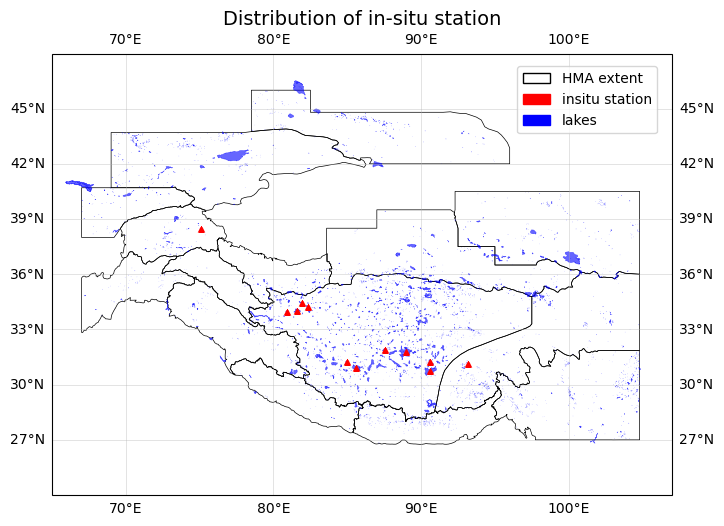

In [5]:
## Lakes
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)

# add region boundaries
hma_gdf.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)

# add lake boundaries
hma_lakes = gpd.read_file(path_hma_region_lake)
hma_lakes.plot(ax=ax, edgecolor='blue', facecolor='blue', 
               alpha=0.6, linewidth=0.3)

# In-situ distribution of sites
lakes_centroids = hma_insitu.to_crs('EPSG:4326').geometry.centroid
ax.plot(lakes_centroids.x, lakes_centroids.y, '^', 
        markersize=3, markerfacecolor='red', 
        markeredgecolor='red', markeredgewidth=1.5,
        transform=ccrs.PlateCarree())

## add legend and gridlines
legend_patches = [
    mpatches.Patch(edgecolor='black', facecolor='none', label='HMA extent', linewidth=1),
    mpatches.Patch(edgecolor='red', facecolor='red', label='insitu station', linewidth=1),
    mpatches.Patch(edgecolor='blue', facecolor='blue', label='lakes', linewidth=1)
]
ax.legend(handles=legend_patches, loc=(0.75, 0.82))
ax.set_title('Distribution of in-situ station', fontsize=14)
plt.show()